# Проект анализа ДТП  
**Источник данных:** http://stat.gibdd.ru/

Дорожно-транспортные происшествия (ДТП) являются одной из основных причин травматизма и смертности на дорогах. Частота аварий зависит от множества факторов: времени суток, дня недели, опыта водителя, типа транспортного средства и особенностей региона. Цель проекта — выявить закономерности, позволяющие прогнозировать число ДТП и использовать эти знания для профилактики.

Я использую методы линейной регрессии для моделирования и объяснения количества ДТП в зависимости от временных факторов. Модель поможет дорожным службам предсказывать периоды повышенного риска и своевременно усиливать меры безопасности.

---

## Задача:
С помощью **линейной регрессии** получить модель, предсказывающую число ДТП в зависимости от дня недели, времени суток, типа транспорта и других параметров.

**Цель:** Получить интерпретируемую модель, отражающую влияние показателей на частоту ДТП.

## Таблицы с данными

In [9]:
import pandas as pd
xls1 = pd.ExcelFile("./assets/dtp1.xls")
dfs1 = [pd.read_excel(xls, sheet_name=sheet, skiprows=9, nrows=32, usecols="B,D").dropna() for sheet in xls1.sheet_names]
xls2 = pd.ExcelFile("./assets/dtp2.xls")
dfs2 = [pd.read_excel(xls, sheet_name=sheet, skiprows=69, nrows=12, usecols="B,D").dropna() for sheet in xls2.sheet_names]
xls3 = pd.ExcelFile("./assets/dtp7.xls")
dfs3 = [pd.read_excel(xls, sheet_name=sheet, skiprows=8, nrows=4, usecols="B,D").dropna() for sheet in xls3.sheet_names]
dfs1, dfs2, dfs3

([                      водителями легковых автомобилей    326
  1           водители находились в состоянии опьянения    8.0
  2   имеющими лицензию на перевозочную деятельность...   67.0
  3      находящихся в собственности физических лиц\t\t  251.0
  5           водители находились в состоянии опьянения    7.0
  7       имеющих лицензию на перевозочную деятельность    0.0
  8                     водителями грузовых автомобилей   50.0
  10          водители находились в состоянии опьянения    0.0
  11        находящихся в собственности физичесиких лиц   27.0
  13          водители находились в состоянии опьянения    0.0
  14                               водителями автобусов   14.0
  16          водители находились в состоянии опьянения    0.0
  17   имеющими лицензию на перевозочную деятельность     14.0
  18     находящихся в собственности физических лиц\t\t    1.0
  20          водители находились в состоянии опьянения    0.0
  22   имеющими лицензию на перевозочную деятельность  

# Дорожно-транспортные происшествия в Российской Федерации

## Изучение статистики

Давайте изучим статистику дорожно-транспортных происшествий в Российской Федерации и попробуем выявить некоторые закономерности.

Возьмем за основу три города федерального значения: Москву, Санкт-Петербург и Севастополь. И изучим официальную статистику ГИБДД по этим городам за февраль 2025 года.

Для начала разберемся, какой день недели самый рискованный, а какой — наименее.

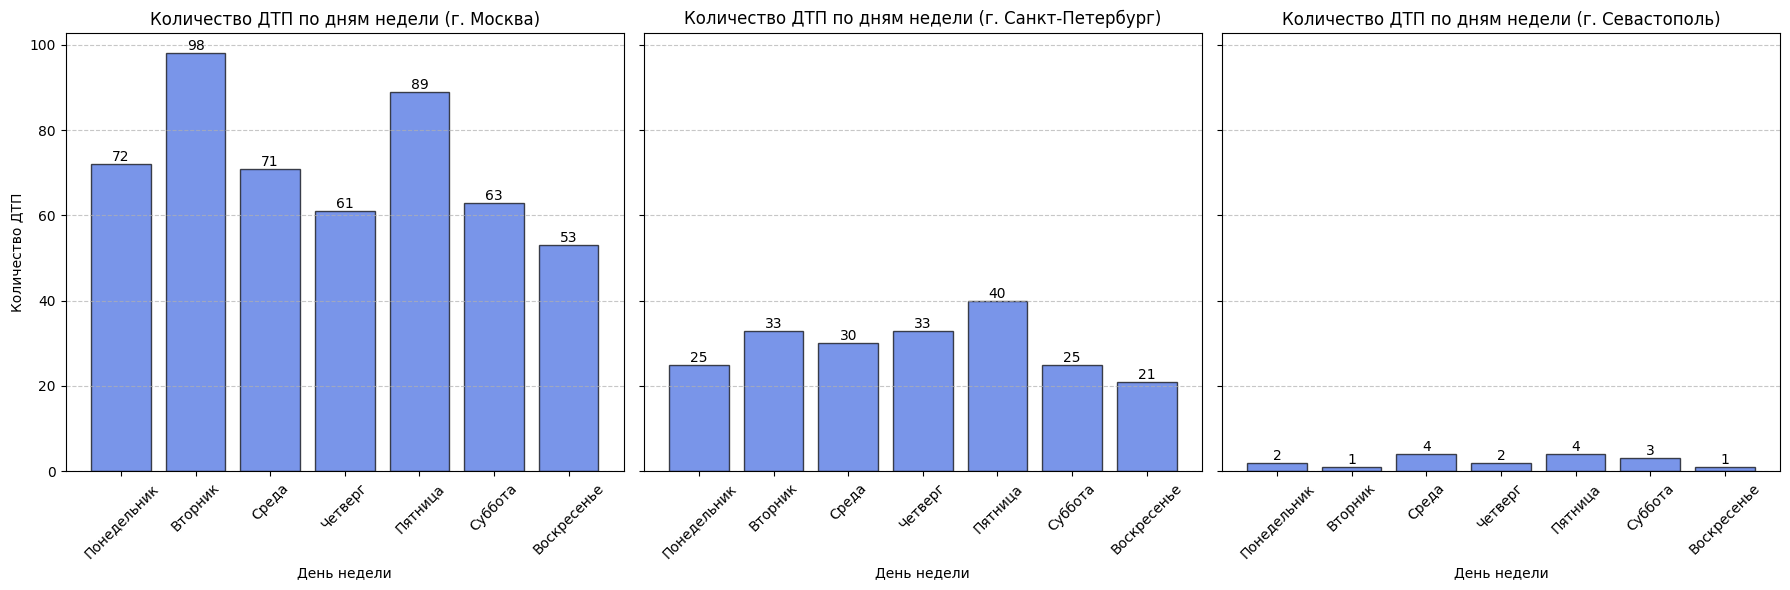

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cities = ['г. Москва', 'г. Санкт-Петербург', 'г. Севастополь']

xls = pd.ExcelFile("./assets/dtp1.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=9, nrows=32, usecols="B,D").dropna() for sheet in xls.sheet_names]
days_of_week = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for ax, df, city in zip(axes, dfs, cities):
    accidents = df.iloc[:7, 1].astype(int).tolist()

    bars = ax.bar(days_of_week, accidents, color='royalblue', alpha=0.7, edgecolor='black')
    for bar, value in zip(bars, accidents):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
    ax.set_title(f"Количество ДТП по дням недели ({city})")
    ax.set_xlabel("День недели")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(days_of_week, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

axes[0].set_ylabel("Количество ДТП")
plt.tight_layout()
plt.show()

Теперь давайте подведем итоги и выделим конкретные дни недели.

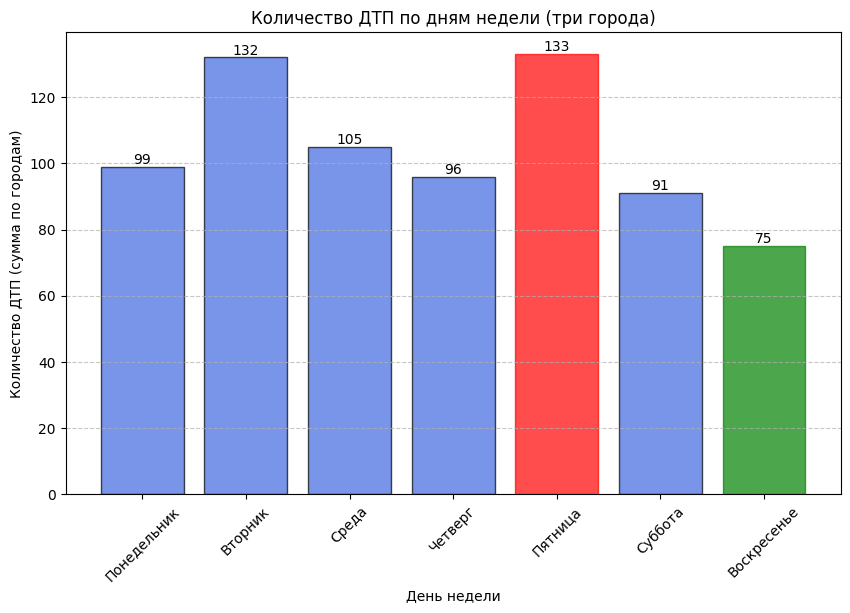

In [ ]:
import numpy as np

accidents_total = sum(df.iloc[:7, 1].astype(int) for df in dfs).tolist()
plt.figure(figsize=(10, 6))
bars = plt.bar(days_of_week, accidents_total, color='royalblue', alpha=0.7, edgecolor='black')
bars[np.argmax(accidents_total)].set_color('red')
bars[np.argmin(accidents_total)].set_color('green')
for bar, value in zip(bars, accidents_total):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel("День недели")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по дням недели (три города)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ну, как мы видим, пятница и вторник — это дни, когда происходит больше всего аварий. В свою очередь, воскресенье — это наоборот — день, когда аварий происходит меньше всего.

В воскресенье на дорогах меньше водителей, так как это выходной. Вторник и пятница — будни, то есть рабочие дни. Возможно, люди спешат на работу или с работы и поэтому чаще попадают в аварии.

Давайте подробнее рассмотрим время, когда аварии случаются чаще и реже.

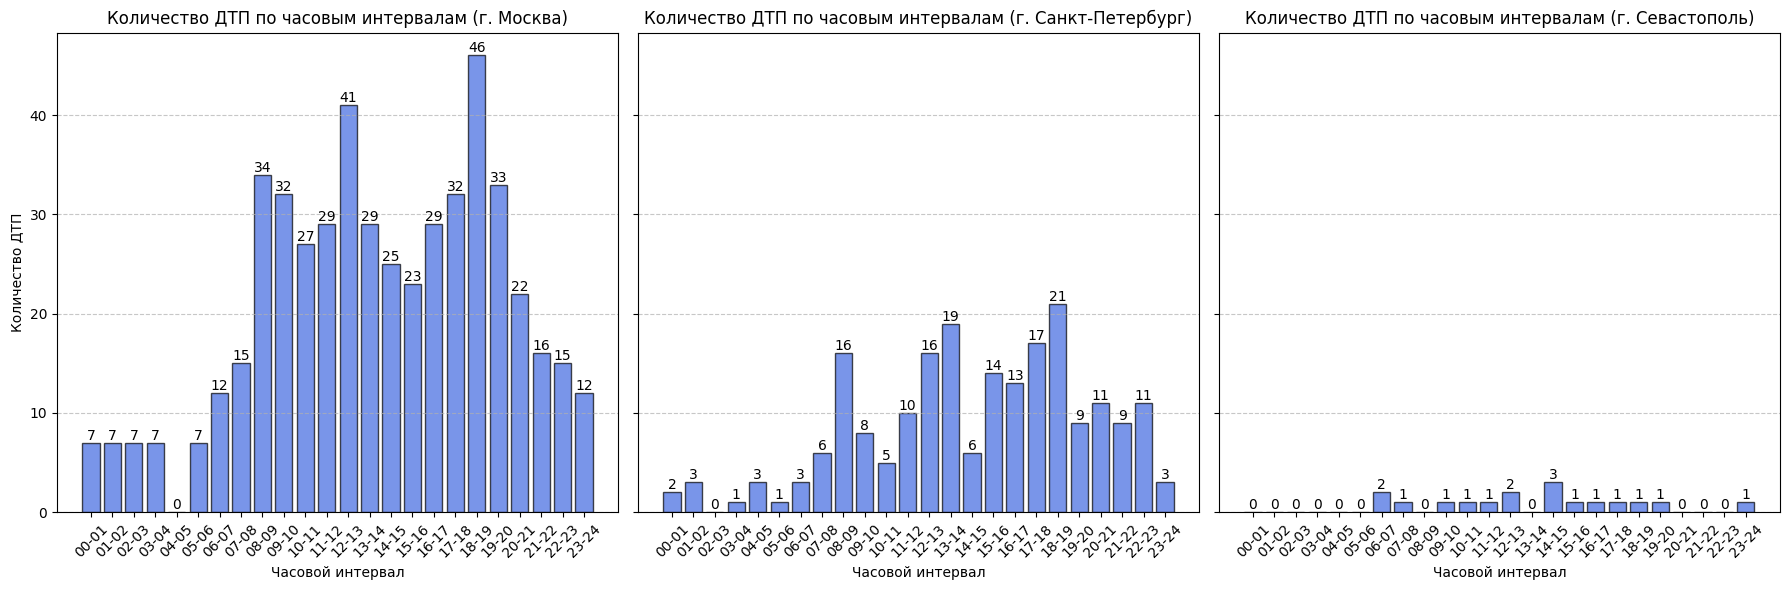

In [ ]:
times = [f"{hour:02d}-{hour+1:02d}" for hour in range(24)]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for ax, df, city in zip(axes, dfs, cities):
    accidents = df.iloc[-24:, 1].astype(int).tolist()

    bars = ax.bar(times, accidents, color='royalblue', alpha=0.7, edgecolor='black')
    for bar, value in zip(bars, accidents):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
    ax.set_title(f"Количество ДТП по часовым интервалам ({city})")
    ax.set_xlabel("Часовой интервал")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(times, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

axes[0].set_ylabel("Количество ДТП")
plt.tight_layout()
plt.show()

У нас есть статистика по трем городам. Теперь давайте выявим наиболее и наименее рискованные временные интервалы

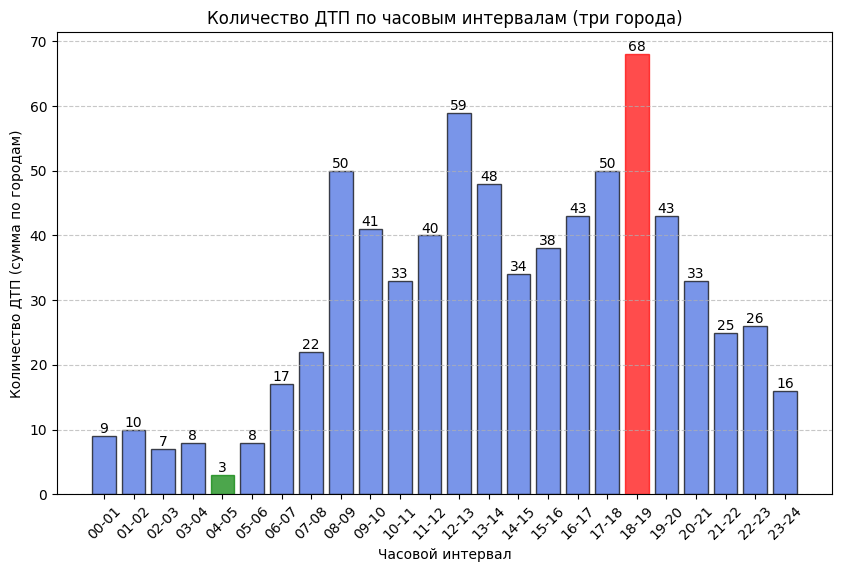

In [ ]:
accidents_total = sum(df.iloc[-24:, 1].astype(int) for df in dfs).tolist()
plt.figure(figsize=(10, 6))
bars = plt.bar(times, accidents_total, color='royalblue', alpha=0.7, edgecolor='black')
bars[np.argmax(accidents_total)].set_color('red')
bars[np.argmin(accidents_total)].set_color('green')
for bar, value in zip(bars, accidents_total):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel("Часовой интервал")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по часовым интервалам (три города)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Как мы видим, наибольшее количество аварий происходит в период с 18:00 до 19:00. Это говорит о том, что люди, возвращающиеся с работы в пятницу вечером, чаще всего попадают в аварии. В это время на дорогах большая загруженность, у водителей снижается концентрация внимания после рабочего дня и т. д. Это приводит к авариям.

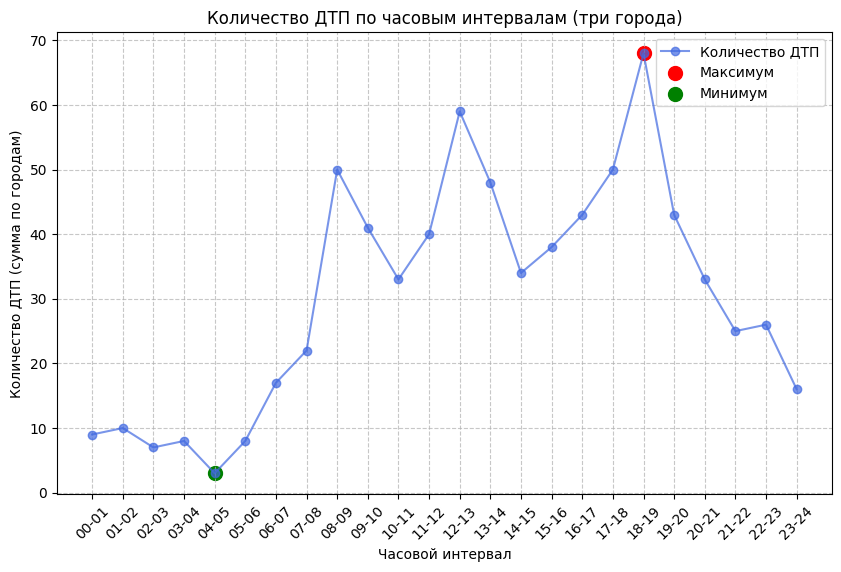

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(times, accidents_total, marker='o', linestyle='-', color='royalblue', alpha=0.7, label="Количество ДТП")
max_index = np.argmax(accidents_total)
min_index = np.argmin(accidents_total)
plt.scatter(times[max_index], accidents_total[max_index], color='red', s=100, label="Максимум")
plt.scatter(times[min_index], accidents_total[min_index], color='green', s=100, label="Минимум")
plt.xlabel("Часовой интервал")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по часовым интервалам (три города)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Теперь давайте выясним, какие водители чаще всего попадают в аварии.

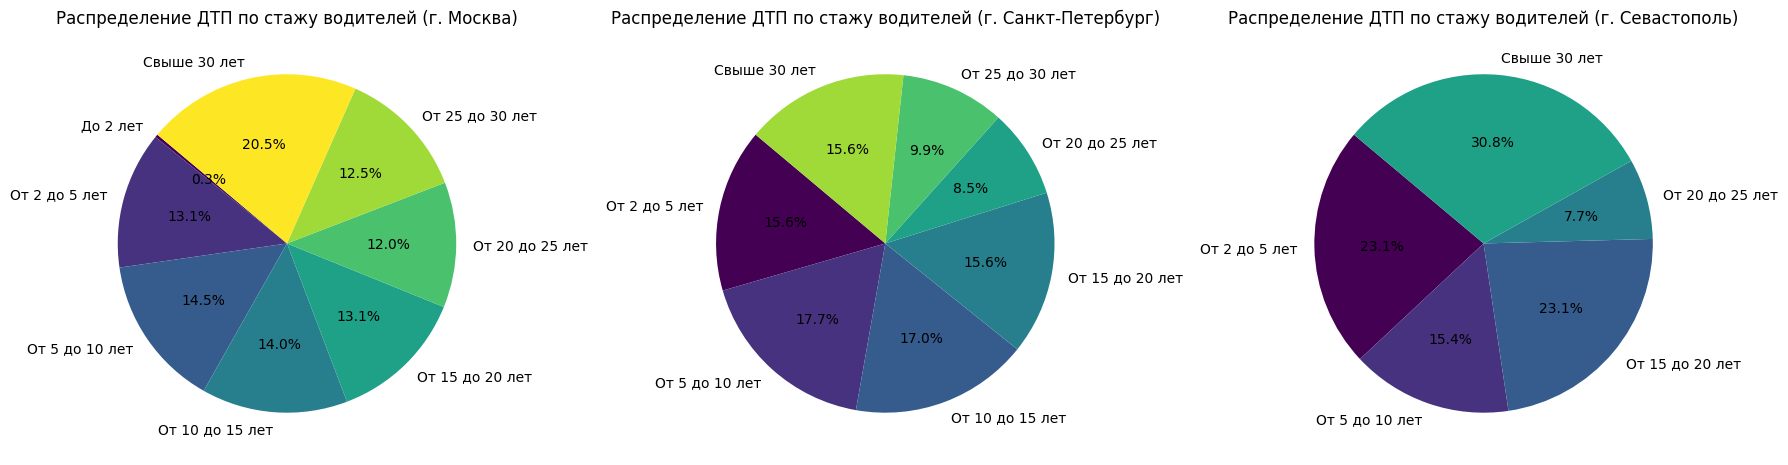

In [ ]:
xls = pd.ExcelFile("./assets/dtp2.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=69, nrows=12, usecols="B,D").dropna() for sheet in xls.sheet_names]
categories = ["До 2 лет", "От 2 до 5 лет", "От 5 до 10 лет", "От 10 до 15 лет", "От 15 до 20 лет", "От 20 до 25 лет", "От 25 до 30 лет", "Свыше 30 лет"]
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, df, city in zip(axes, dfs, cities):
  data = df.iloc[:1, 1].astype(int).tolist() + df.iloc[-7:, 1].astype(int).tolist()
  filtered_values, filtered_labels = zip(*[(v, c) for v, c in zip(data, categories) if v > 0])
  wedges = ax.pie(filtered_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140, colors=colors)
  ax.set_title(f"Распределение ДТП по стажу водителей ({city})")

plt.tight_layout()
plt.show()

Сложно выделить категорию водителей в каком-либо городе, которые чаще всего попадали бы в аварии. Можно с уверенностью сказать лишь то, что водители со стажем вождения до 2 лет практически не попадают в аварии. Это связано с тем, что водители первые два года практически не садятся за руль

В заключение оценим, насколько качественно работает ГИБДД и быстро задерживает преступников, пытавшихся скрыться.

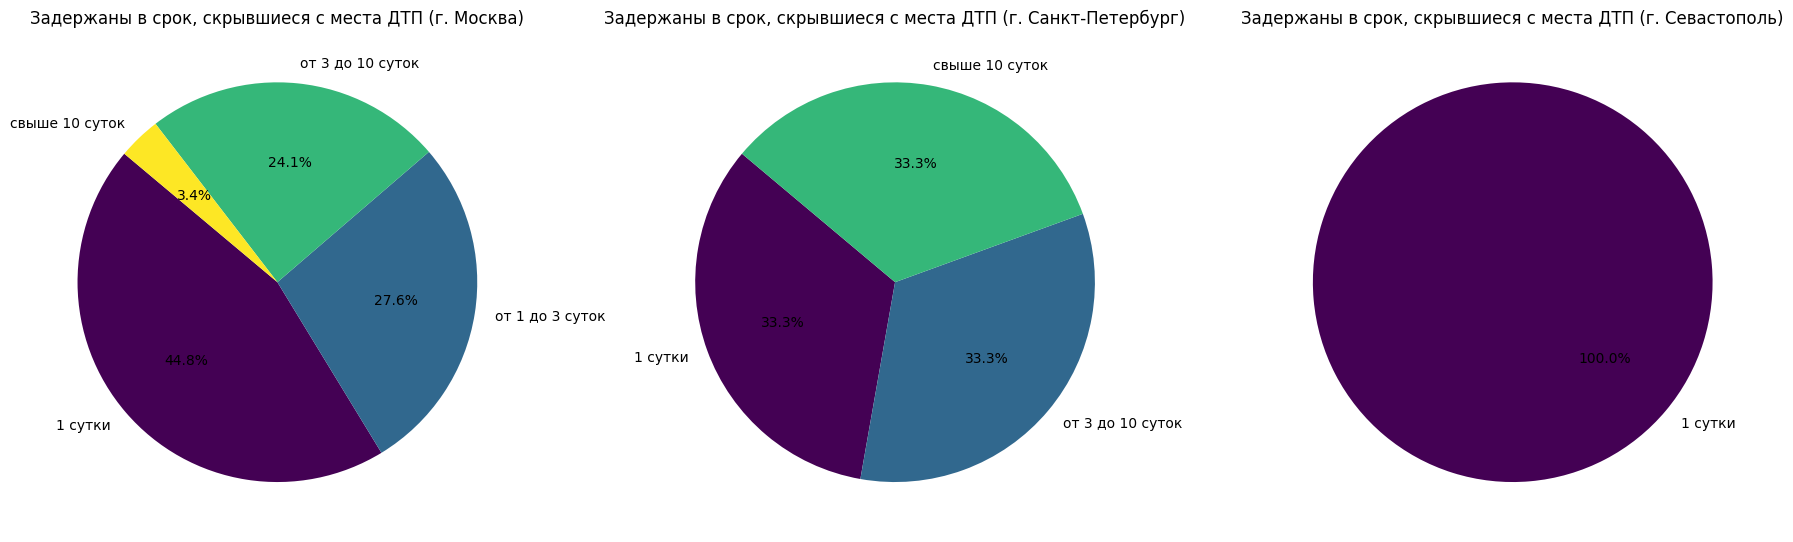

In [ ]:
xls = pd.ExcelFile("./assets/dtp7.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=8, nrows=4, usecols="B,D").dropna() for sheet in xls.sheet_names]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, df, city in zip(axes, dfs, cities):
  categories = df.iloc[:,0].tolist()
  colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
  data = df.iloc[:, 1].astype(int).tolist()
  filtered_values, filtered_labels = zip(*[(v, c) for v, c in zip(data, categories) if v > 0])
  wedges = ax.pie(filtered_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140, colors=colors)
  ax.set_title(f"Задержаны в срок, скрывшиеся с места ДТП ({city})")

plt.tight_layout()
plt.show()

Как мы видим, статистика по разным городам слишком сильно отличается друг от друга.

В Севастополе из-за небольшого города и малого количества аварий все скрывшиеся находятся в течение 1 дня

В Санкт-Петербурге каждый третий водитель находится в течение 10 дней.

В Москве почти 50% находятся в течение 1 дня и 70% находятся в течение первых 3 дней

## Обучение модели

### Загрузка и подготовка данных

Загружаются Excel-файлы с информацией о ДТП за 2022–2024 годы. Для каждого месяца формируются два набора данных: количество аварий по дням недели и по часовым интервалам. Также добавляются признаки: сезон, выходной и время суток.

### Обучение линейных моделей

Создаются и обучаются две модели линейной регрессии: одна для предсказания числа ДТП по дням недели, вторая — по часам суток. Используются признаки года, месяца, дня недели, выходного и времени суток.

### Оценка качества моделей

Оценивается точность моделей с помощью метрик R² и MSE. Затем строятся диаграммы рассеяния, на которых сравниваются реальные и предсказанные значения числа ДТП.

Model for days of week:
R2 score: 0.3477
MSE: 439.404495

Model for hours of day:
R2 score: 0.4777
MSE: 173.190093


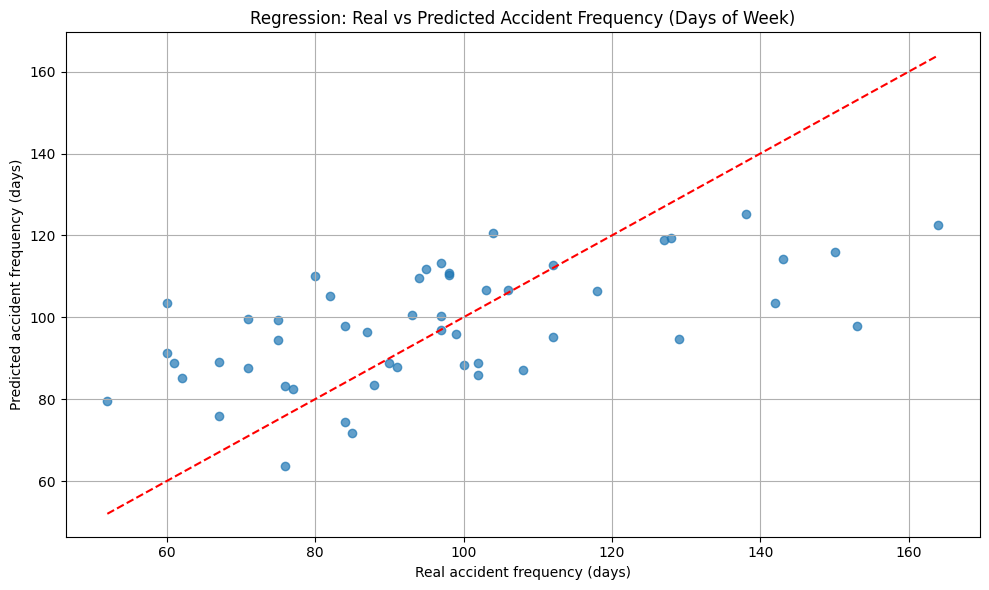

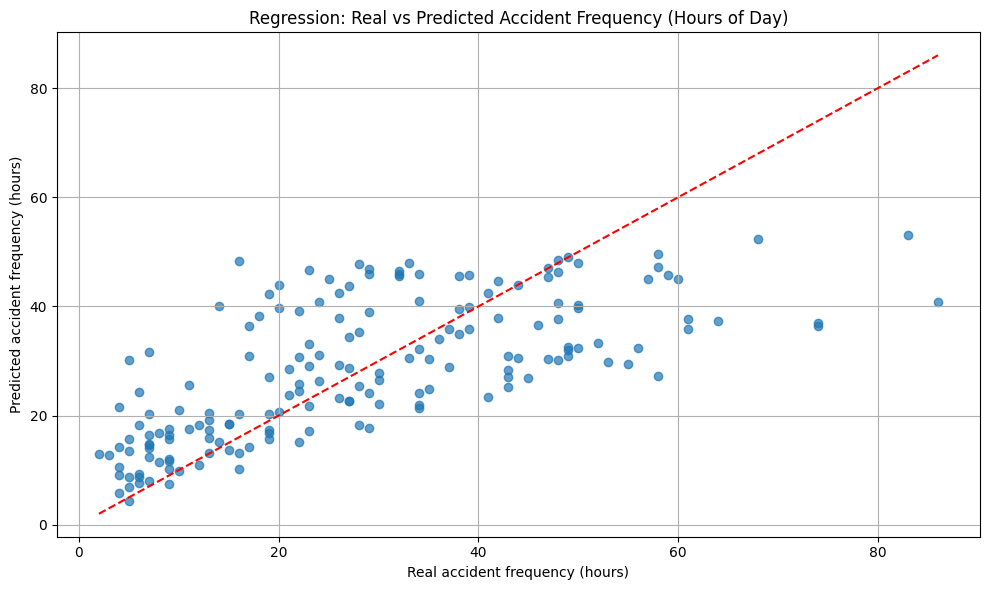

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import glob
import os

all_day_records = []
all_hour_records = []

years = ['2022', '2023', '2024']
base_path = "./assets/project/"

for year in years:
    year_path = os.path.join(base_path, year)
    files = sorted(glob.glob(os.path.join(year_path, "dtp_*.xls")))

    for month_idx, file in enumerate(files, start=1):
        xls_days = pd.ExcelFile(file)
        dfs = [pd.read_excel(xls_days, sheet_name=sheet, skiprows=9, nrows=32, usecols="B,D").dropna() for sheet in xls_days.sheet_names]
        season = (month_idx - 1) // 3 + 1
        for df in dfs:
            for day_idx, day_name in enumerate(["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"], start=1):
                accidents_day = int(df.iloc[day_idx - 1, 1])
                weekend = 1 if day_idx in [6, 7] else 0
                all_day_records.append({
                    "year": int(year),
                    "month": month_idx,
                    "day_of_week": day_idx,
                    "weekend": weekend,
                    "season": season,
                    "accidents": accidents_day
                })

            for hour in range(24):
                accidents_hour = int(df.iloc[7 + hour, 1])
                if hour < 6:
                    time_of_day = 0 # Ночь
                elif hour < 12:
                    time_of_day = 1 # Утро
                elif hour < 18:
                    time_of_day = 2 # День
                else:
                    time_of_day = 3 # Вечер
                all_hour_records.append({
                    "year": int(year),
                    "month": month_idx,
                    "hour_of_day": hour,
                    "time_of_day": time_of_day,
                    "season": season,
                    "accidents": accidents_hour
                })

df_days = pd.DataFrame(all_day_records)
df_hours = pd.DataFrame(all_hour_records)

# Модель по дням недели
X_days = df_days[["year", "month", "day_of_week", "weekend", "season"]]
y_days = df_days["accidents"]

X_train_days, X_test_days, y_train_days, y_test_days = train_test_split(X_days, y_days, test_size=0.2, random_state=42)
model_days = LinearRegression()
model_days.fit(X_train_days, y_train_days)
feature_importance_days = pd.Series(model_days.coef_, index=X_days.columns)

# Модель по часам суток
X_hours = df_hours[["year", "month", "hour_of_day", "time_of_day", "season"]]
y_hours = df_hours["accidents"]

X_train_hours, X_test_hours, y_train_hours, y_test_hours = train_test_split(X_hours, y_hours, test_size=0.2, random_state=42)
model_hours = LinearRegression()
model_hours.fit(X_train_hours, y_train_hours)
feature_importance_hours = pd.Series(model_hours.coef_, index=X_hours.columns)

print("Model for days of week:")
print(f"R2 score: {r2_score(y_test_days, model_days.predict(X_test_days)):.4f}")
print(f"MSE: {mean_squared_error(y_test_days, model_days.predict(X_test_days)):.6f}")

print("\nModel for hours of day:")
print(f"R2 score: {r2_score(y_test_hours, model_hours.predict(X_test_hours)):.4f}")
print(f"MSE: {mean_squared_error(y_test_hours, model_hours.predict(X_test_hours)):.6f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_days, model_days.predict(X_test_days), alpha=0.7)
plt.plot([y_test_days.min(), y_test_days.max()], [y_test_days.min(), y_test_days.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (days)")
plt.ylabel("Predicted accident frequency (days)")
plt.title("Regression: Real vs Predicted Accident Frequency (Days of Week)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_hours, model_hours.predict(X_test_hours), alpha=0.7)
plt.plot([y_test_hours.min(), y_test_hours.max()], [y_test_hours.min(), y_test_hours.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (hours)")
plt.ylabel("Predicted accident frequency (hours)")
plt.title("Regression: Real vs Predicted Accident Frequency (Hours of Day)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Оценка качества модели

Модель предсказания по дням недели показывает, что означает: около **35% дисперсии** в данных объясняется моделью. Среднеквадратичная ошибка (MSE) составляет **439**, что указывает на довольно большую разницу между предсказанными и реальными значениями.

Модель по часам суток показывает более высокую точность. Значение MSE равно **173**, что также указывает на более точные предсказания по сравнению с моделью для дней недели.


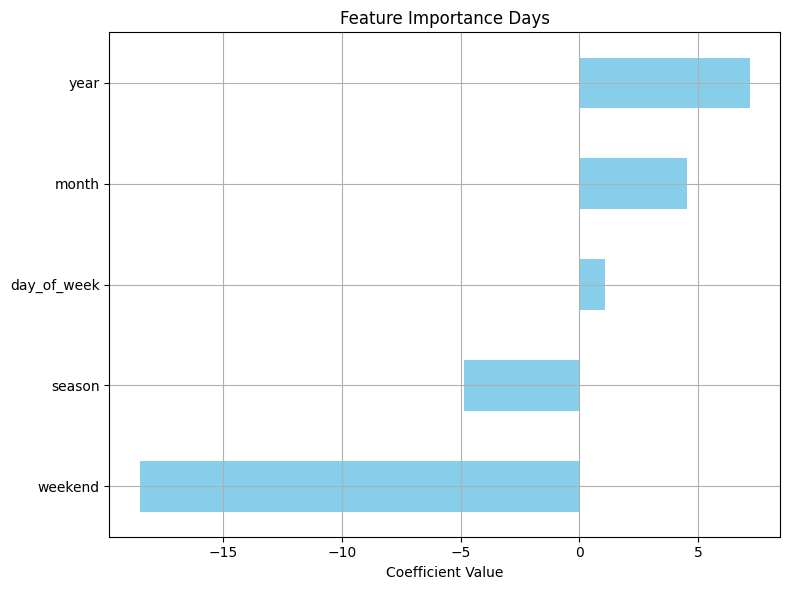

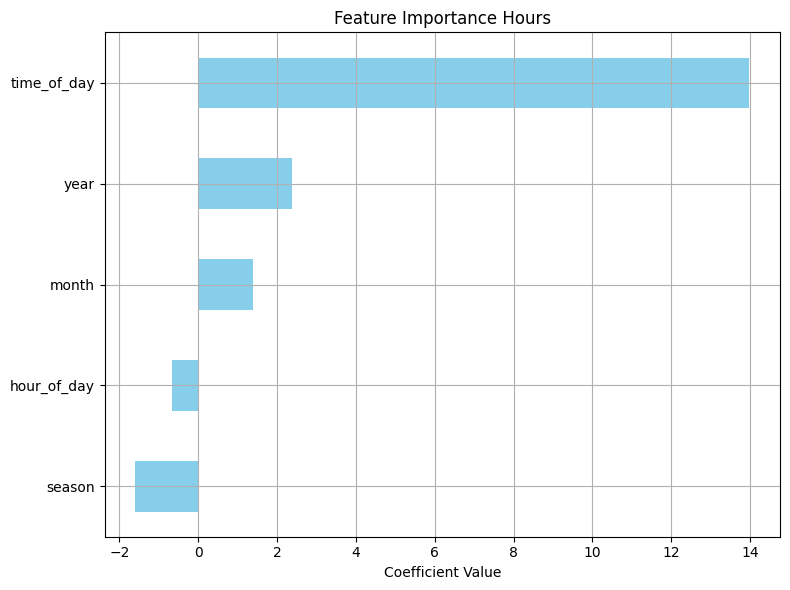

In [246]:
plt.figure(figsize=(8, 6))
feature_importance_days.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance Days")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
feature_importance_hours.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance Hours")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Анализ важности признаков

На первом графике видно, что для модели по дням недели **наиболее значимым признаком является `weekend`**, то есть выходной день. Он имеет наибольший отрицательный коэффициент, что указывает на **существенное снижение числа ДТП в выходные**. Признаки `year` и `month` также оказывают умеренное положительное влияние, а `season` — отрицательное.

На втором графике для модели по часам суток **наибольшую важность имеет `time_of_day`**, что логично: количество ДТП заметно зависит от времени суток. Остальные признаки, включая `month`, `year` и `hour_of_day`, оказывают сравнительно меньшее влияние. Это говорит о том, что **тип времени суток (ночь, утро, день, вечер)** играет гораздо большую роль в распределении аварий, чем точный час.

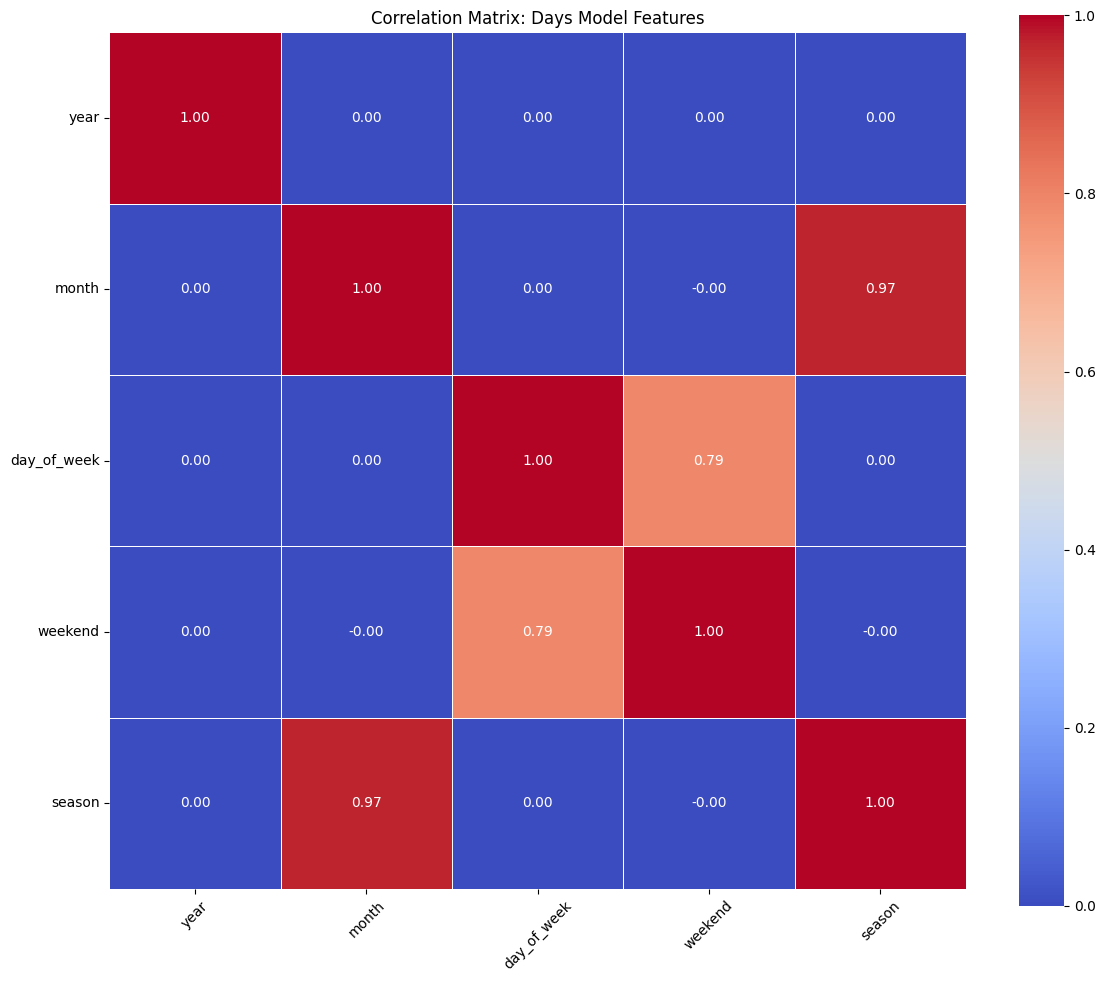

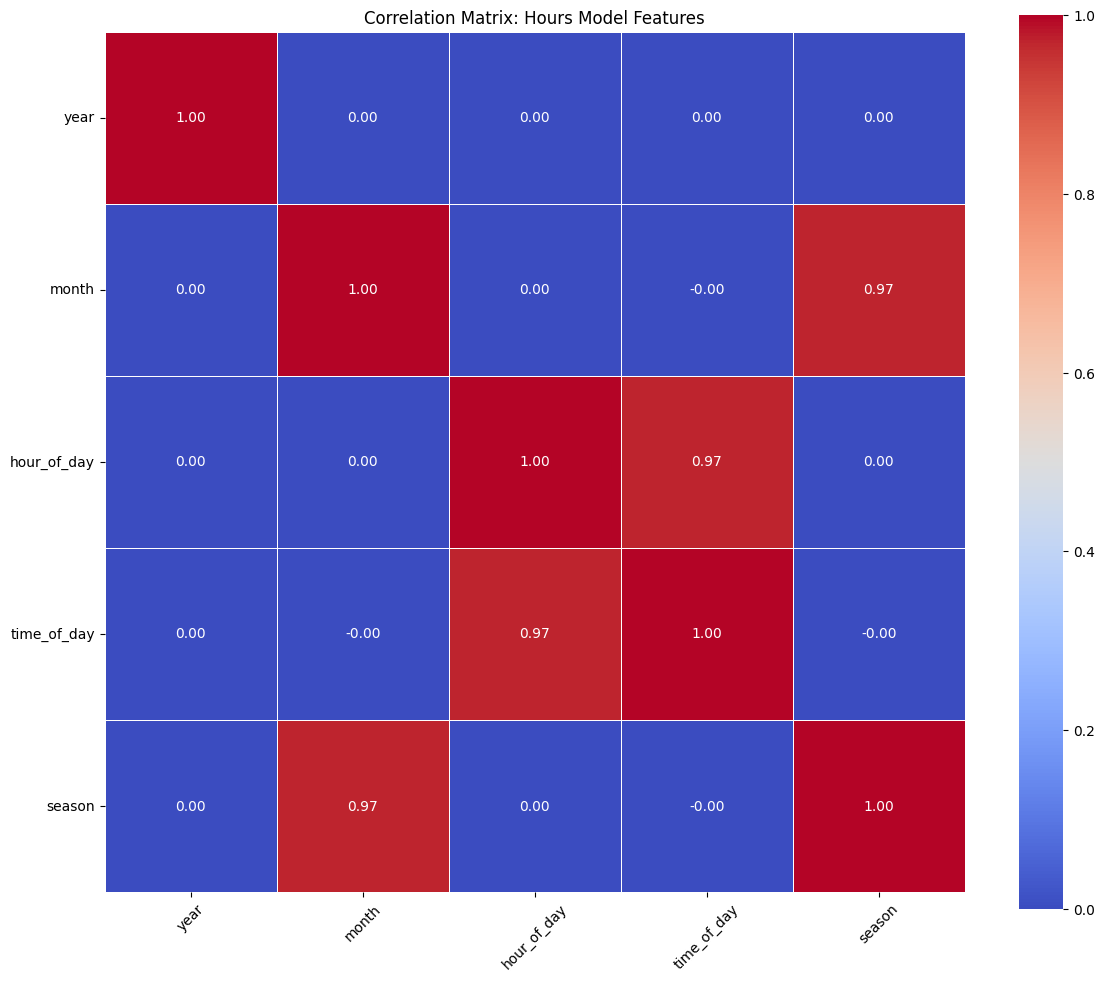

In [250]:
import seaborn as sns

def plot_correlation_matrix(df, title="Correlation Matrix of Features"):
    corr_matrix = df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(X_days, title="Correlation Matrix: Days Model Features")
plot_correlation_matrix(X_hours, title="Correlation Matrix: Hours Model Features")

### Корреляция признаков

На первом графике (модель по дням недели) видно, что признаки `day_of_week` и `weekend` имеют сильную корреляцию (0.79), что логично: выходные всегда приходятся на определённые дни. Также `month` и `season` ожидаемо сильно коррелируют (0.97), ведь сезон напрямую зависит от месяца.

На втором графике (модель по часам суток) аналогично наблюдается сильная корреляция между `hour_of_day` и `time_of_day` (0.97), что тоже естественно, поскольку один признак агрегирует другой. Кроме того, `month` и `season` снова показывают высокую корреляцию (0.97).

### Подготовка данных и обучение моделей

В этом блоке осуществляется сбор и обработка данных о ДТП за 2022–2024 годы. Из Excel-файлов извлекаются агрегированные значения по дням недели и часам суток, формируются датафреймы `df_days` и `df_hours`. Затем данные кодируются с помощью one-hot encoding, и для каждой группы признаков обучаются линейные модели. Визуализация позволяет оценить точность предсказаний по метрикам R² и MSE, а также сравнить реальные и предсказанные значения на диаграммах рассеяния.

Model for days of week:
R2 score: 0.5532
MSE: 308.182778

Model for hours of day:
R2 score: 0.8230
MSE: 58.835230


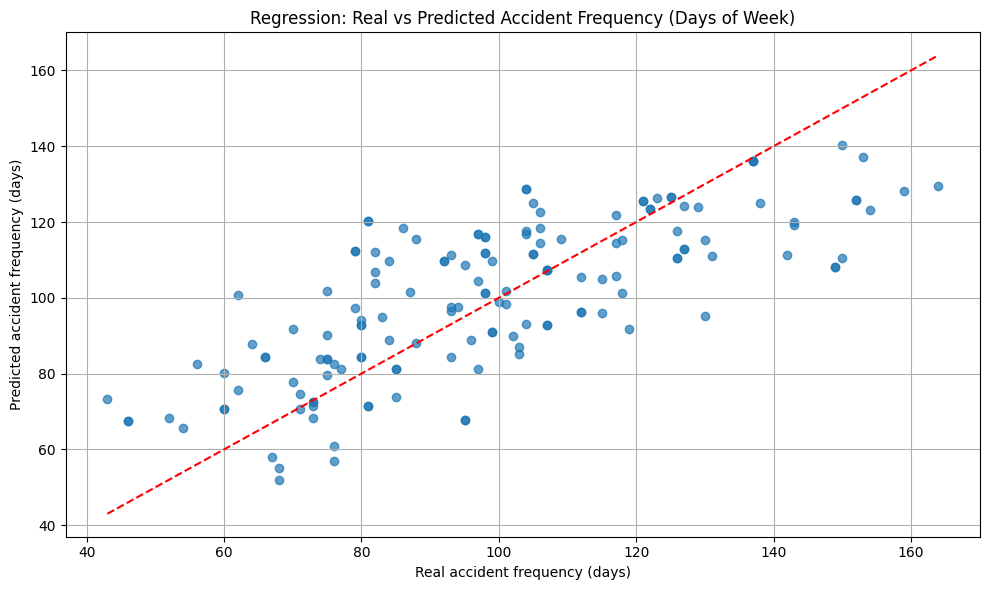

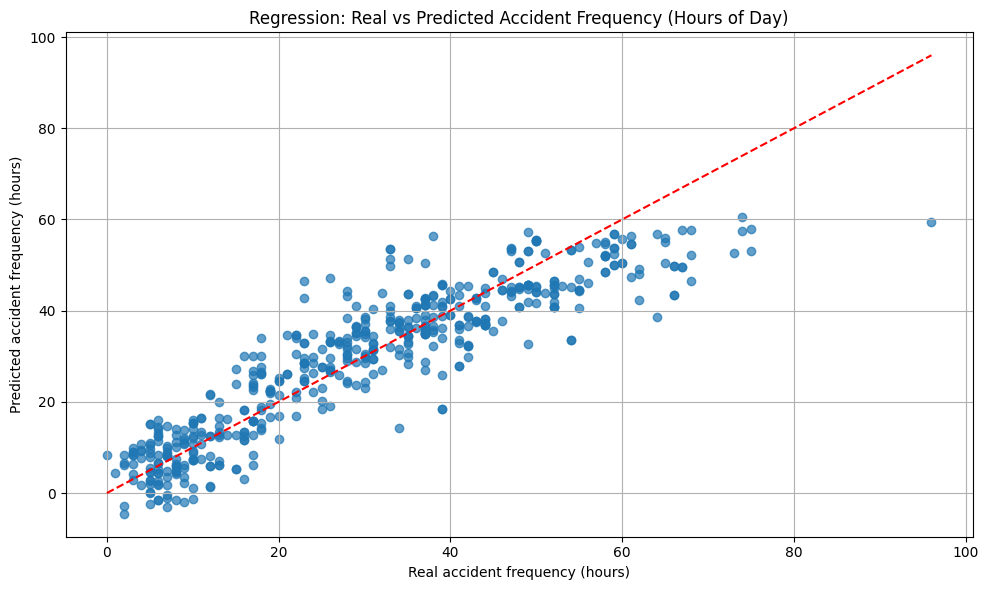

In [259]:
for year in years:
    year_path = os.path.join(base_path, year)
    files = sorted(glob.glob(os.path.join(year_path, "dtp_*.xls")))

    for month_idx, file in enumerate(files, start=1):
        xls_days = pd.ExcelFile(file)
        dfs = [pd.read_excel(xls_days, sheet_name=sheet, skiprows=9, nrows=32, usecols="B,D").dropna() for sheet in xls_days.sheet_names]
        for df in dfs:
            for day_idx in range(1, 8):
                accidents_day = int(df.iloc[day_idx - 1, 1])
                weekend = 1 if day_idx in [6, 7] else 0
                season = (month_idx - 1) // 3 + 1
                all_day_records.append({
                    "year": int(year),
                    "month": month_idx,
                    "day_of_week": day_idx,
                    "weekend": weekend,
                    "season": season,
                    "accidents": accidents_day
                })

            for hour in range(24):
                accidents_hour = int(df.iloc[7 + hour, 1])
                if hour < 6:
                    time_of_day = 0
                elif hour < 12:
                    time_of_day = 1
                elif hour < 18:
                    time_of_day = 2
                else:
                    time_of_day = 3
                season = (month_idx - 1) // 3 + 1
                all_hour_records.append({
                    "year": int(year),
                    "month": month_idx,
                    "hour_of_day": hour,
                    "time_of_day": time_of_day,
                    "season": season,
                    "accidents": accidents_hour
                })

df_days = pd.DataFrame(all_day_records)
df_hours = pd.DataFrame(all_hour_records)

# One-hot encoding признаков для модели по дням недели
X_days = pd.get_dummies(df_days[["year", "month", "day_of_week", "weekend", "season"]].astype(int),
                        columns=["year", "month", "day_of_week", "weekend", "season"])
y_days = df_days["accidents"]

X_train_days, X_test_days, y_train_days, y_test_days = train_test_split(X_days, y_days, test_size=0.2, random_state=42)
model_days = LinearRegression()
model_days.fit(X_train_days, y_train_days)
feature_importance_days = pd.Series(model_days.coef_, index=X_days.columns)

# One-hot encoding признаков для модели по часам суток
X_hours = pd.get_dummies(df_hours[["year", "month", "hour_of_day", "time_of_day", "season"]].astype(int),
                         columns=["year", "month", "hour_of_day", "time_of_day", "season"])
y_hours = df_hours["accidents"]

X_train_hours, X_test_hours, y_train_hours, y_test_hours = train_test_split(X_hours, y_hours, test_size=0.2, random_state=42)
model_hours = LinearRegression()
model_hours.fit(X_train_hours, y_train_hours)
feature_importance_hours = pd.Series(model_hours.coef_, index=X_hours.columns)

print("Model for days of week:")
print(f"R2 score: {r2_score(y_test_days, model_days.predict(X_test_days)):.4f}")
print(f"MSE: {mean_squared_error(y_test_days, model_days.predict(X_test_days)):.6f}")

print("\nModel for hours of day:")
print(f"R2 score: {r2_score(y_test_hours, model_hours.predict(X_test_hours)):.4f}")
print(f"MSE: {mean_squared_error(y_test_hours, model_hours.predict(X_test_hours)):.6f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_days, model_days.predict(X_test_days), alpha=0.7)
plt.plot([y_test_days.min(), y_test_days.max()], [y_test_days.min(), y_test_days.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (days)")
plt.ylabel("Predicted accident frequency (days)")
plt.title("Regression: Real vs Predicted Accident Frequency (Days of Week)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_hours, model_hours.predict(X_test_hours), alpha=0.7)
plt.plot([y_test_hours.min(), y_test_hours.max()], [y_test_hours.min(), y_test_hours.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (hours)")
plt.ylabel("Predicted accident frequency (hours)")
plt.title("Regression: Real vs Predicted Accident Frequency (Hours of Day)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Оценка качества моделей

Значение R² и MSE улучшились, по сравнению с прерыдущей моделью. Однако разница между результатами и предсказаниями остается слишком большой.

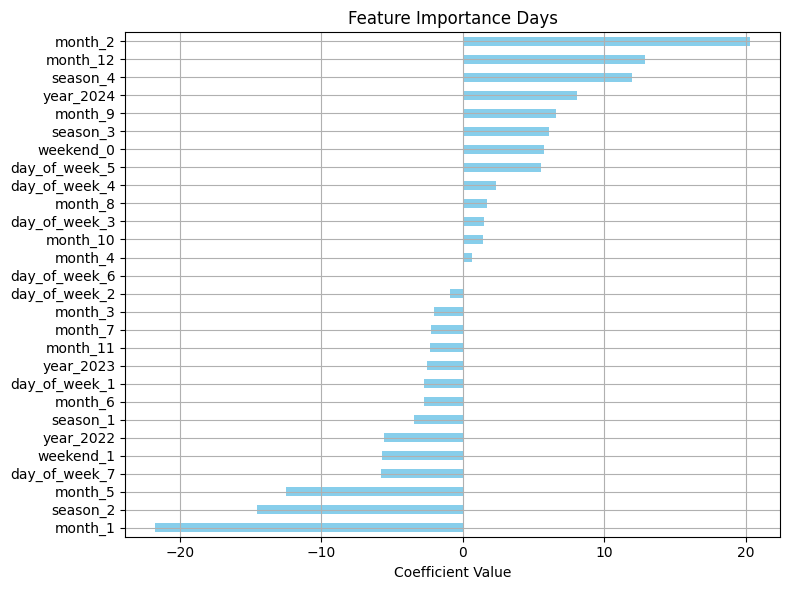

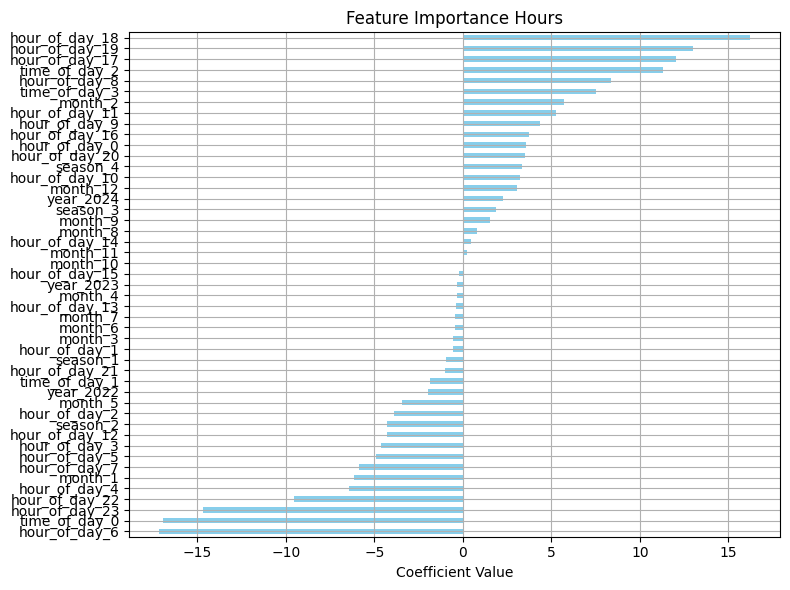

In [260]:
plt.figure(figsize=(8, 6))
feature_importance_days.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance Days")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
feature_importance_hours.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance Hours")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Влияние признаков в модели (One-Hot Encoding)

Графики показывают важность категориальных признаков после one-hot encoding. Для модели по дням наибольшее положительное влияние оказывают определённые месяцы и сезоны, в то время как, например, первый месяц года уменьшает количество ДТП. Для модели по часам ключевую роль играют отдельные часы (например, 18:00–20:00) и временные интервалы (день, вечер), указывая на пиковые периоды аварийности. Такие графики помогают понять, какие временные параметры сильнее всего влияют на уровень ДТП.

### Обучение модели с использованием Random Forest

В этой части проекта используется метод RandomForestRegressor для предсказания абсолютного количества ДТП по дням недели и часам суток. Данные предварительно кодируются с помощью one-hot encoding, после чего модель обучается отдельно для дневных и часовых интервалов. Визуализация предсказаний позволяет оценить точность модели: чем ближе точки к диагонали, тем выше качество предсказания. Такой подход часто даёт лучшую точность по сравнению с линейной регрессией за счёт учета нелинейных зависимостей.

Model for days of week:
R2 score: 0.9470
MSE: 36.527400

Model for hours of day:
R2 score: 0.9825
MSE: 5.832081


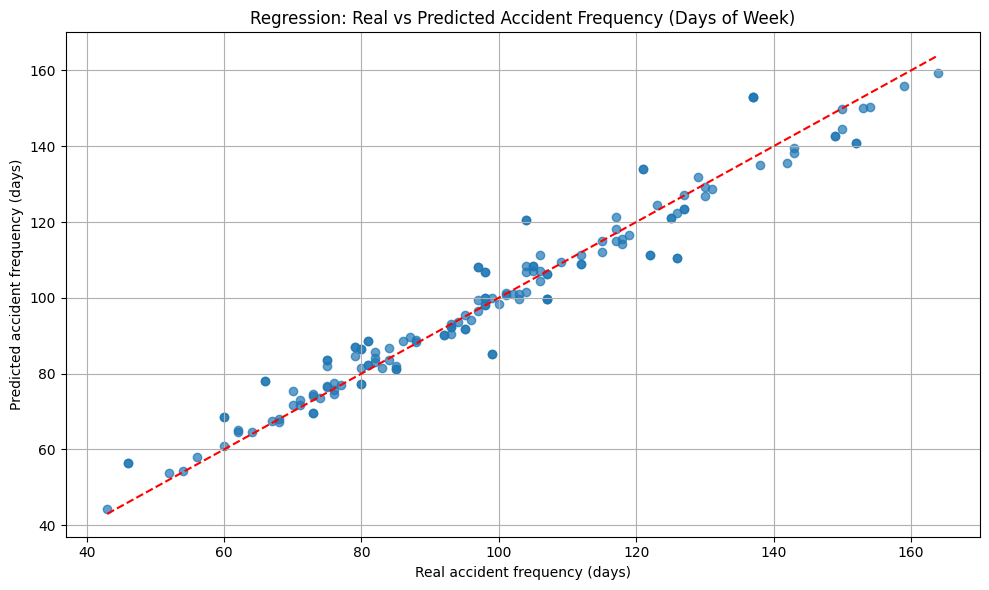

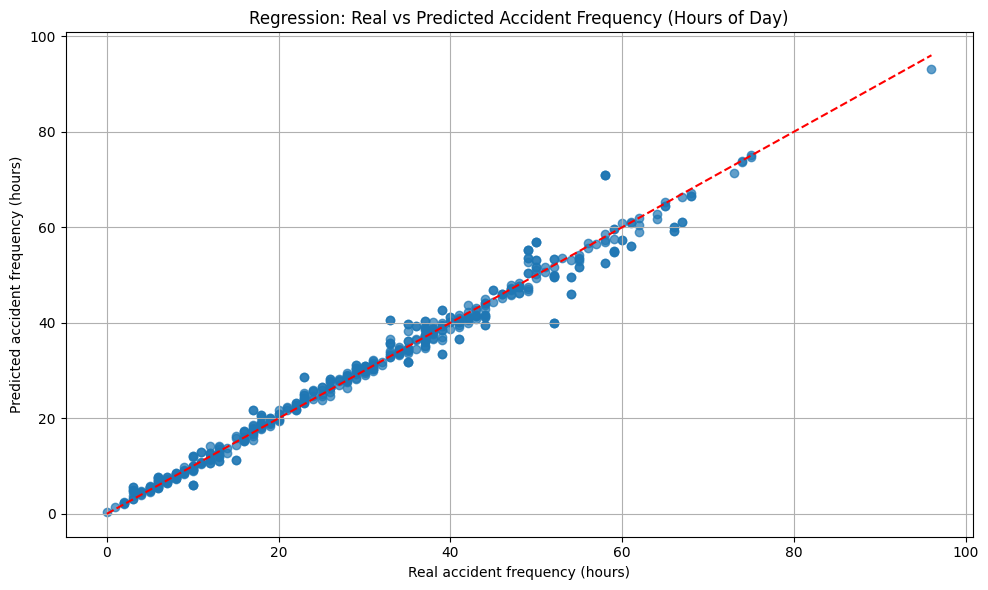

In [270]:
from sklearn.ensemble import RandomForestRegressor
df_days["relative"] = df_days.groupby(["year", "month"])["accidents"].transform(lambda x: x / x.sum())
df_hours["relative"] = df_hours.groupby(["year", "month"])["accidents"].transform(lambda x: x / x.sum())

X_days = pd.get_dummies(
    df_days[["year", "month", "day_of_week", "weekend", "season"]].astype(int),
    columns=["year", "month", "day_of_week", "weekend", "season"]
)
X_hours = pd.get_dummies(
    df_hours[["year", "month", "hour_of_day", "time_of_day", "season"]].astype(int),
    columns=["year", "month", "hour_of_day", "time_of_day", "season"]
)

y_days = df_days["accidents"]
y_hours = df_hours["accidents"]

X_train_hours, X_test_hours, y_train_hours, y_test_hours = train_test_split(
    X_hours, y_hours, test_size=0.2, random_state=42
)
model_hours = RandomForestRegressor(n_estimators=100, random_state=42)
model_hours.fit(X_train_hours, y_train_hours)

X_train_days, X_test_days, y_train_days, y_test_days = train_test_split(
    X_days, y_days, test_size=0.2, random_state=42
)
model_days = RandomForestRegressor(n_estimators=100, random_state=42)
model_days.fit(X_train_days, y_train_days)

print("Model for days of week:")
print(f"R2 score: {r2_score(y_test_days, model_days.predict(X_test_days)):.4f}")
print(f"MSE: {mean_squared_error(y_test_days, model_days.predict(X_test_days)):.6f}")

print("\nModel for hours of day:")
print(f"R2 score: {r2_score(y_test_hours, model_hours.predict(X_test_hours)):.4f}")
print(f"MSE: {mean_squared_error(y_test_hours, model_hours.predict(X_test_hours)):.6f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_days, model_days.predict(X_test_days), alpha=0.7)
plt.plot([y_test_days.min(), y_test_days.max()], [y_test_days.min(), y_test_days.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (days)")
plt.ylabel("Predicted accident frequency (days)")
plt.title("Regression: Real vs Predicted Accident Frequency (Days of Week)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_hours, model_hours.predict(X_test_hours), alpha=0.7)
plt.plot([y_test_hours.min(), y_test_hours.max()], [y_test_hours.min(), y_test_hours.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (hours)")
plt.ylabel("Predicted accident frequency (hours)")
plt.title("Regression: Real vs Predicted Accident Frequency (Hours of Day)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Результаты модели на основе Random Forest

Модель, обученная с использованием RandomForestRegressor, показала высокое качество предсказаний как для числа ДТП по дням недели, так и по часам суток:

- **R² score** свидетельствует о почти полном объяснении дисперсии в данных.
- **MSE (среднеквадратичная ошибка)** снизилась что указывает на минимальные отклонения между предсказанными и реальными значениями.
- На диаграммах видно, что точки плотно ложатся вдоль диагонали, что подтверждает высокую точность модели.

Эти результаты демонстрируют, что случайный лес эффективно справляется с задачей предсказания частоты ДТП, учитывая нелинейные зависимости между признаками.

## Обучение модели Random Forest с использованием относительных значений

В этом блоке кода осуществляется обучение моделей на основе **случайного леса (RandomForestRegressor)** для предсказания **относительной доли ДТП** в дне недели и в течение суток:

- Сначала рассчитываются относительные значения (`relative`) — доля ДТП по дням и часам в пределах каждого месяца. Это позволяет модели работать с пропорциями, не зависящими от общего количества ДТП в разные месяцы.
- Данные кодируются через **one-hot encoding** для представления категориальных признаков (месяц, день недели, сезон и т.д.).
- Далее обучаются две отдельные модели: одна для дневного распределения, вторая — для почасового.
- Модель использует 1000 деревьев (n_estimators=1000), что улучшает точность предсказаний.
- Для оценки качества используются метрики **R²** и **MSE**, а также визуализация: предсказанные значения сравниваются с реальными долями на диаграммах рассеяния.

Этот подход позволяет строить модели, которые фокусируются на **структуре распределения ДТП**, а не на их абсолютном количестве, что особенно полезно при прогнозировании внутри дня или недели.

Model for days of week:
R2 score: 0.9155
MSE: 0.000006

Model for hours of day:
R2 score: 0.9838
MSE: 0.000001


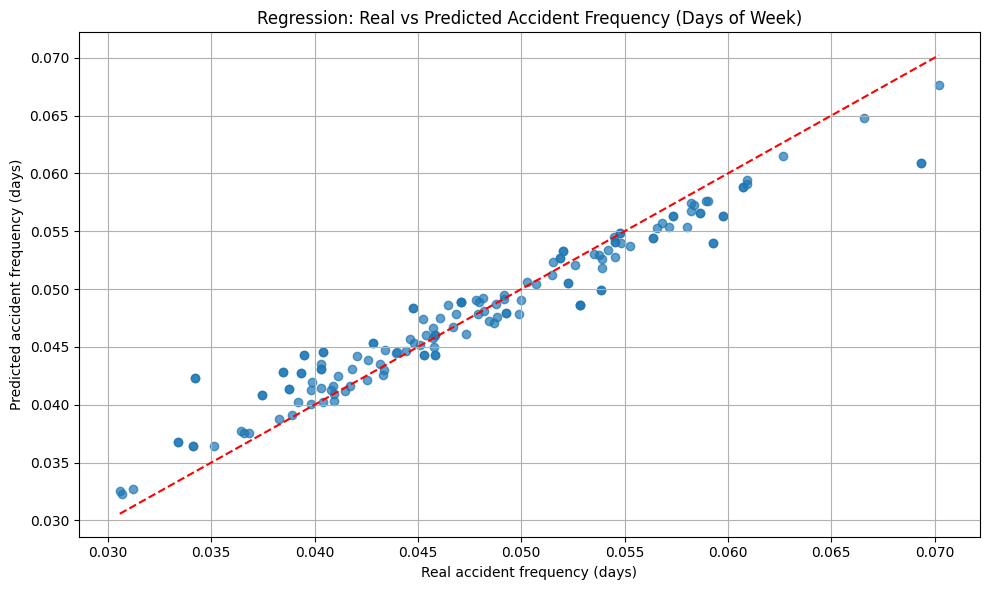

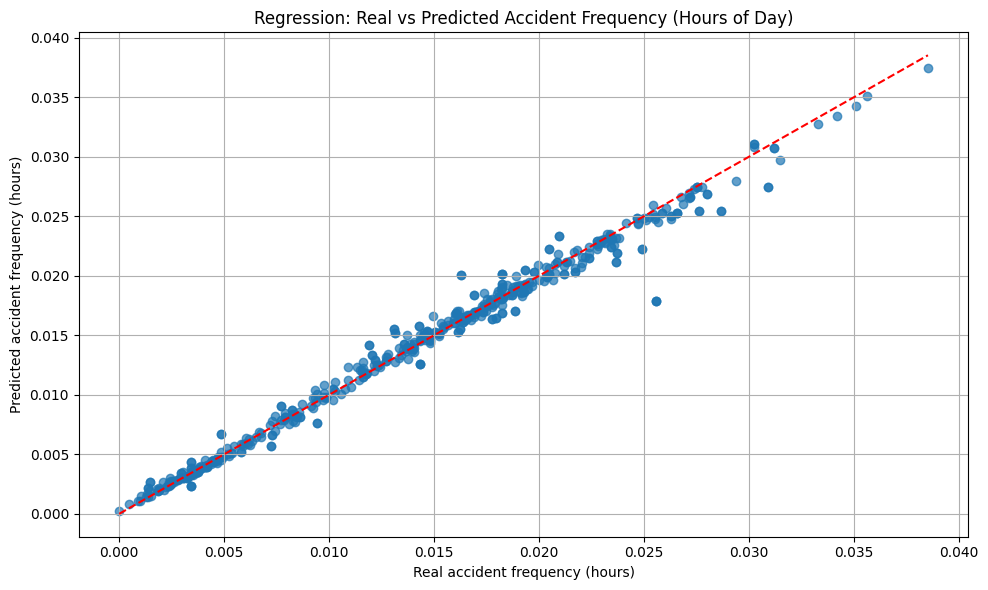

In [273]:
from sklearn.ensemble import RandomForestRegressor
df_days["relative"] = df_days.groupby(["year", "month"])["accidents"].transform(lambda x: x / x.sum())
df_hours["relative"] = df_hours.groupby(["year", "month"])["accidents"].transform(lambda x: x / x.sum())

X_days = pd.get_dummies(
    df_days[["year", "month", "day_of_week", "weekend", "season"]].astype(int),
    columns=["year", "month", "day_of_week", "weekend", "season"]
)
X_hours = pd.get_dummies(
    df_hours[["year", "month", "hour_of_day", "time_of_day", "season"]].astype(int),
    columns=["year", "month", "hour_of_day", "time_of_day", "season"]
)

y_days = df_days["relative"]
y_hours = df_hours["relative"]

X_train_hours, X_test_hours, y_train_hours, y_test_hours = train_test_split(
    X_hours, y_hours, test_size=0.2, random_state=42
)
model_hours = RandomForestRegressor(n_estimators=1000, random_state=42)
model_hours.fit(X_train_hours, y_train_hours)

X_train_days, X_test_days, y_train_days, y_test_days = train_test_split(
    X_days, y_days, test_size=0.2, random_state=42
)
model_days = RandomForestRegressor(n_estimators=1000, random_state=42)
model_days.fit(X_train_days, y_train_days)

print("Model for days of week:")
print(f"R2 score: {r2_score(y_test_days, model_days.predict(X_test_days)):.4f}")
print(f"MSE: {mean_squared_error(y_test_days, model_days.predict(X_test_days)):.6f}")

print("\nModel for hours of day:")
print(f"R2 score: {r2_score(y_test_hours, model_hours.predict(X_test_hours)):.4f}")
print(f"MSE: {mean_squared_error(y_test_hours, model_hours.predict(X_test_hours)):.6f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_days, model_days.predict(X_test_days), alpha=0.7)
plt.plot([y_test_days.min(), y_test_days.max()], [y_test_days.min(), y_test_days.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (days)")
plt.ylabel("Predicted accident frequency (days)")
plt.title("Regression: Real vs Predicted Accident Frequency (Days of Week)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_hours, model_hours.predict(X_test_hours), alpha=0.7)
plt.plot([y_test_hours.min(), y_test_hours.max()], [y_test_hours.min(), y_test_hours.max()], color='red', linestyle='--')
plt.xlabel("Real accident frequency (hours)")
plt.ylabel("Predicted accident frequency (hours)")
plt.title("Regression: Real vs Predicted Accident Frequency (Hours of Day)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Результаты модели Random Forest с предсказанием относительных долей ДТП

На диаграммах показано сравнение предсказанных и реальных относительных значений ДТП:

- **Для модели по дням недели**:
  - Модель хорошо объясняет дисперсию целевой переменной.
  - Очень низкая среднеквадратичная ошибка указывает на высокую точность предсказаний.
  - Точки плотно располагаются вдоль диагонали, что свидетельствует о хорошей калибровке модели.

- **Для модели по часам суток**:
  - Модель практически идеально описывает зависимость.
  - Предсказания модели практически не отличаются от реальных значений.
  - Рассеяние точек минимально, что говорит о высокой стабильности модели на всех участках интервала.

Таким образом, модели успешно захватывают структуру распределения ДТП как по дням недели, так и по часам суток, несмотря на использование только относительных долей.

In [275]:
def predict_accidents_combined(month, day_of_week, hour_of_day):
    fixed_year = 2024
    weekend = 1 if day_of_week in [6, 7] else 0
    season = (month - 1) // 3 + 1

    input_day = pd.DataFrame([[fixed_year, month, day_of_week, weekend, season]],
                             columns=["year", "month", "day_of_week", "weekend", "season"])
    hour_records = []
    for h in range(24):
        if h < 6:
            t = 0
        elif h < 12:
            t = 1
        elif h < 18:
            t = 2
        else:
            t = 3
        hour_records.append([fixed_year, month, h, t, season])

    input_hours = pd.DataFrame(hour_records, columns=["year", "month", "hour_of_day", "time_of_day", "season"])

    pred_day = model_days.predict(input_day)[0]

    raw_hour_preds = model_hours.predict(input_hours)
    raw_hour_preds = np.clip(raw_hour_preds, 0, None)

    sum_raw = np.sum(raw_hour_preds)
    if sum_raw == 0:
        normalized_weights = np.ones_like(raw_hour_preds) / len(raw_hour_preds)
    else:
        normalized_weights = raw_hour_preds / sum_raw

    final_prediction = pred_day * normalized_weights[hour_of_day]

    return {
        "predicted_total_day": pred_day,
        "normalized_hour_weights": normalized_weights,
        "final_prediction_for_hour": final_prediction
    }

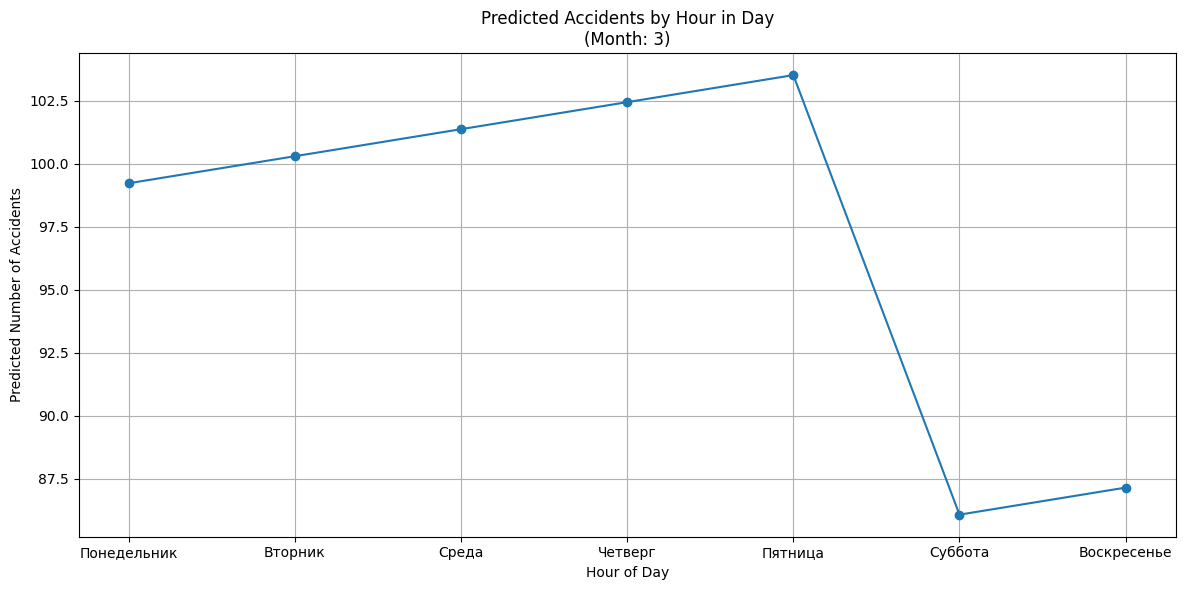

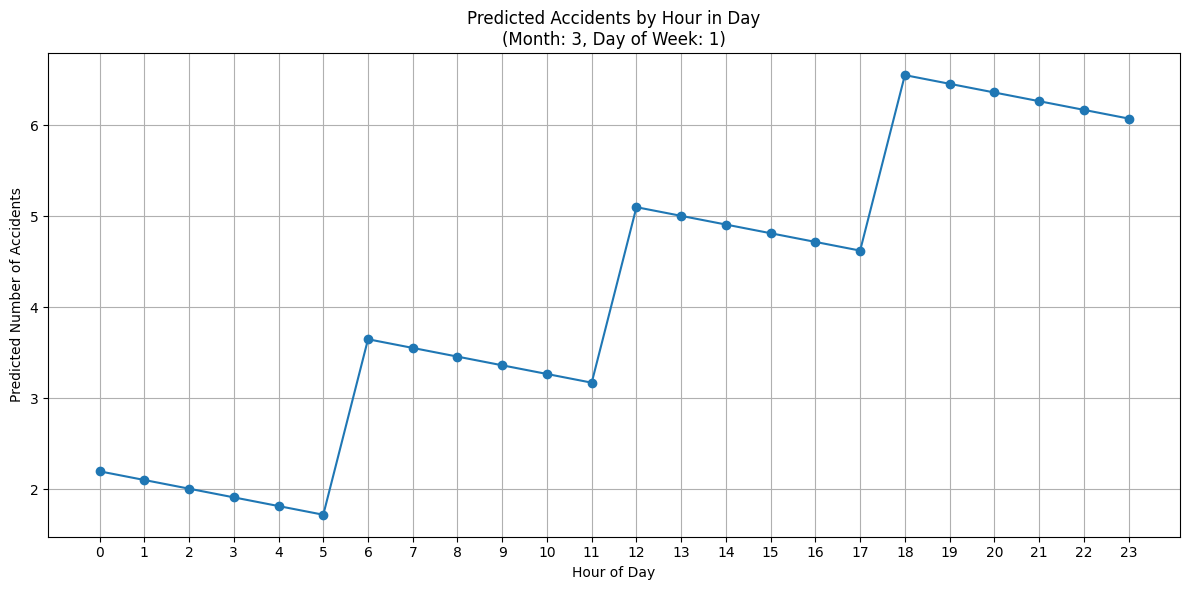

In [294]:
def plot_predicted_accidents_by_day(month):
    results = []
    for day in range(7):
        result = predict_accidents_combined(month, day + 1, hour_of_day=0)
        results.append(result["predicted_total_day"])

    days_of_week = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
    plt.figure(figsize=(12, 6))
    plt.plot(days_of_week, results, marker='o', linestyle='-')
    plt.title(f"Predicted Accidents by Hour in Day\n(Month: {month})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Number of Accidents")
    plt.xticks(days_of_week)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def plot_predicted_accidents_by_hour(month, day_of_week):
    result = predict_accidents_combined(month, day_of_week, hour_of_day=0)
    total_accidents = result["predicted_total_day"]
    normalized_weights = result["normalized_hour_weights"]
    predicted_per_hour = total_accidents * normalized_weights

    hours = np.arange(24)
    plt.figure(figsize=(12, 6))
    plt.plot(hours, predicted_per_hour, marker='o', linestyle='-')
    plt.title(f"Predicted Accidents by Hour in Day\n(Month: {month}, Day of Week: {day_of_week})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Number of Accidents")
    plt.xticks(hours)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predicted_accidents_by_day(month=3)
plot_predicted_accidents_by_hour(month=3, day_of_week=1)

## Визуализация предсказаний по дням недели и часам суток

На верхнем графике показано ожидаемое общее количество ДТП по дням недели в марте. Видно, что наибольшая аварийность прогнозируется в будние дни, особенно в пятницу. В выходные — особенно в субботу — количество аварий заметно снижается.

Нижний график отображает распределение ДТП по часам в понедельник марта. Предсказания модели показывают меньшую аварийность ночью, увеличение с началом рабочего дня, пик около 13:00 и особенно в вечерние часы — с 18:00 до 21:00. Такое распределение соответствует типичной загруженности дорог в течение дня.